In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
drive_path = '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters'

In [13]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2

np.random.seed(42)

In [4]:
with open(drive_path + '/arabcharsrgb.pkl', 'rb') as f:
    ac_data = pickle.load(f)

In [5]:
train_imgs = ac_data[0].copy()
test_imgs = ac_data[1].copy()
train_labels = ac_data[2].copy()
test_labels = ac_data[3].copy()
X_train = ac_data[4].copy()
X_test = ac_data[5].copy()
y_train = ac_data[6].copy()
y_test = ac_data[7].copy()
class_dict = ac_data[8].copy()

## CNN Model #3
Trying something similar to a model from [this](https://towardsdatascience.com/going-beyond-99-mnist-handwritten-digits-recognition-cfff96337392) website

In [19]:
model = Sequential([
# Layer 1
Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,3), kernel_regularizer=l2(0.0005)),
# Layer 2
Conv2D(filters = 32, kernel_size = 5, strides = 1, use_bias=False),
# Layer 3
BatchNormalization(),
# — — — — — — — — — — — — — — — — #
Activation('relu'),
MaxPooling2D(pool_size = 2, strides = 2),
Dropout(0.25),
# — — — — — — — — — — — — — — — — #
# Layer 3
Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', kernel_regularizer=l2(0.0005)),
# Layer 4
Conv2D(filters = 64, kernel_size = 3, strides = 1, use_bias=False),
# Layer 5
BatchNormalization(),
# — — — — — — — — — — — — — — — — #
Activation('relu'),
MaxPooling2D(pool_size = 2, strides = 2),
Dropout(0.25),
Flatten(),
# — — — — — — — — — — — — — — — — #
# Layer 6
Dense(units = 256, use_bias=False),
# Layer 7
BatchNormalization(),
# — — — — — — — — — — — — — — — — #
Activation('relu'),
# — — — — — — — — — — — — — — — — #
# Layer 8
Dense(units = 128, use_bias=False),
# Layer 9
BatchNormalization(),
# — — — — — — — — — — — — — — — — #
Activation('relu'),
# — — — — — — — — — — — — — — — — #
# Layer 10
Dense(units = 84, use_bias=False),
# Layer 11
BatchNormalization(),
# — — — — — — — — — — — — — — — — #
Activation('relu'),
Dropout(0.25),
# — — — — — — — — — — — — — — — — #
# Output
Dense(28, activation = 'softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=30)

Epoch 1/30
210/210 [==============================] - 17s 73ms/step - loss: 2.2520 - accuracy: 0.3553 - val_loss: 3.8527 - val_accuracy: 0.1009
Epoch 2/30
210/210 [==============================] - 15s 72ms/step - loss: 1.0217 - accuracy: 0.6993 - val_loss: 1.6519 - val_accuracy: 0.4890
Epoch 3/30
210/210 [==============================] - 15s 71ms/step - loss: 0.6562 - accuracy: 0.8077 - val_loss: 0.6065 - val_accuracy: 0.8060
Epoch 4/30
210/210 [==============================] - 15s 72ms/step - loss: 0.4960 - accuracy: 0.8556 - val_loss: 0.3976 - val_accuracy: 0.8780
Epoch 5/30
210/210 [==============================] - 15s 72ms/step - loss: 0.4074 - accuracy: 0.8791 - val_loss: 0.2953 - val_accuracy: 0.9205
Epoch 6/30
210/210 [==============================] - 15s 72ms/step - loss: 0.3629 - accuracy: 0.8921 - val_loss: 0.4100 - val_accuracy: 0.8717
Epoch 7/30
210/210 [==============================] - 15s 71ms/step - loss: 0.3268 - accuracy: 0.9047 - val_loss: 0.6034 - val_accuracy:

In [22]:
def plot_training(model_history=history):
    plt.figure(figsize=(8,10))

    plt.subplot(2,1,1)
    plt.title('Model Loss', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=12)
    plt.plot(model_history.history['loss'], label='Train Loss')
    plt.plot(model_history.history['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.title('Model Accuracy', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=12)
    plt.plot(model_history.history['accuracy'], label='Train Accuracy')
    plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()

    plt.subplots_adjust(hspace=0.5) 
    plt.show()

    return

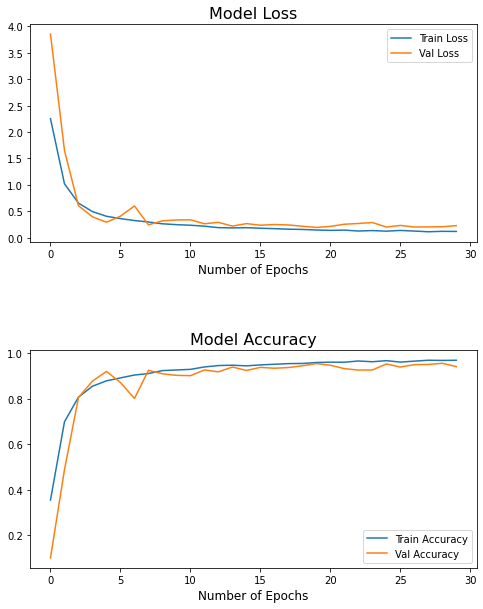

In [23]:
plot_training()

In [24]:
model.evaluate(X_test, y_test)

105/105 [==============================] - 1s 8ms/step - loss: 0.2306 - accuracy: 0.9417


[0.23064054548740387, 0.9416666626930237]

## Model Performance
We're seeing slight improvement with this model - loss of 0.3709 and accuracy of 93.81%

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        25600     
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 64)       

In [26]:
model.save(drive_path + 'models/copied_model.h5')